# Time Series Analysis Benchmarks
#### Created: Jan. 9, 2019

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
from pylab import rcParams

## Configuration Parameters

In [6]:
VAR_NAME = "UNRATE"

## Load the dataset and Summary Statistics

In [12]:
df = pd.read_csv("./data/UNRATE.csv", index_col=0, parse_dates=True)
df.columns = [VAR_NAME]
print(df.head())
print("==================")
print(df.describe())

            UNRATE
DATE              
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
           UNRATE
count  852.000000
mean     5.763028
std      1.638414
min      2.500000
25%      4.600000
50%      5.600000
75%      6.800000
max     10.800000


## First Order Differencing
### First Order Diffenced Series
$$ y'_t \equiv y_t - y_{t-1} \quad \forall t \in T $$
**NOTE**: We should **not** use multiple `periods` parameters to generate more features.

For example, with
$$ \Delta_{1,t} \equiv x_t - x_{t-1} $$
and
$$ \Delta_{2, t} \equiv x_t - x_{t-2} $$
We can easily find that 
$$ \Delta_{2,t} = x_t - x_{t-1} + x_{t-1} - x_{t-2} = \Delta_{1, t} + \Delta_{1, t-1}$$
We can achieve this simply by using higher `num_time_steps` parameter with 1 period differencing.

**NOTE** Consider using higher-order differencing if the differenced series is still non-stationary.

In [13]:
diff = df.diff(periods=1)
diff.dropna(inplace=True)

In [15]:
print(diff.head())
print(diff.describe())

            UNRATE
DATE              
1948-02-01     0.4
1948-03-01     0.2
1948-04-01    -0.1
1948-05-01    -0.4
1948-06-01     0.1
           UNRATE
count  851.000000
mean     0.000588
std      0.209002
min     -1.500000
25%     -0.100000
50%      0.000000
75%      0.100000
max      1.300000


## Log Transformation and Differencing
### Log-transformed Series:
$$ y'_t \equiv \log y_t \quad \forall t \in T $$
### Log-differenced Series:
$$ y''_t \equiv \log y_t - \log y_{t-1} \quad \forall t \in T$$

In [20]:
df_log = np.log(df)
log_diff = df_log.diff(periods=1)
log_diff.dropna(inplace=True)

In [35]:
## Splitting Dataset
ts = df.index
ts_train = ts[:int(0.8 * len(ts))]
ts_val = ts[int(0.8 * len(ts)):int(0.9 * len(ts))]
ts_test = ts[int(0.9 * len(ts)):]

## Plots of the Raw Data and Transformed Variations

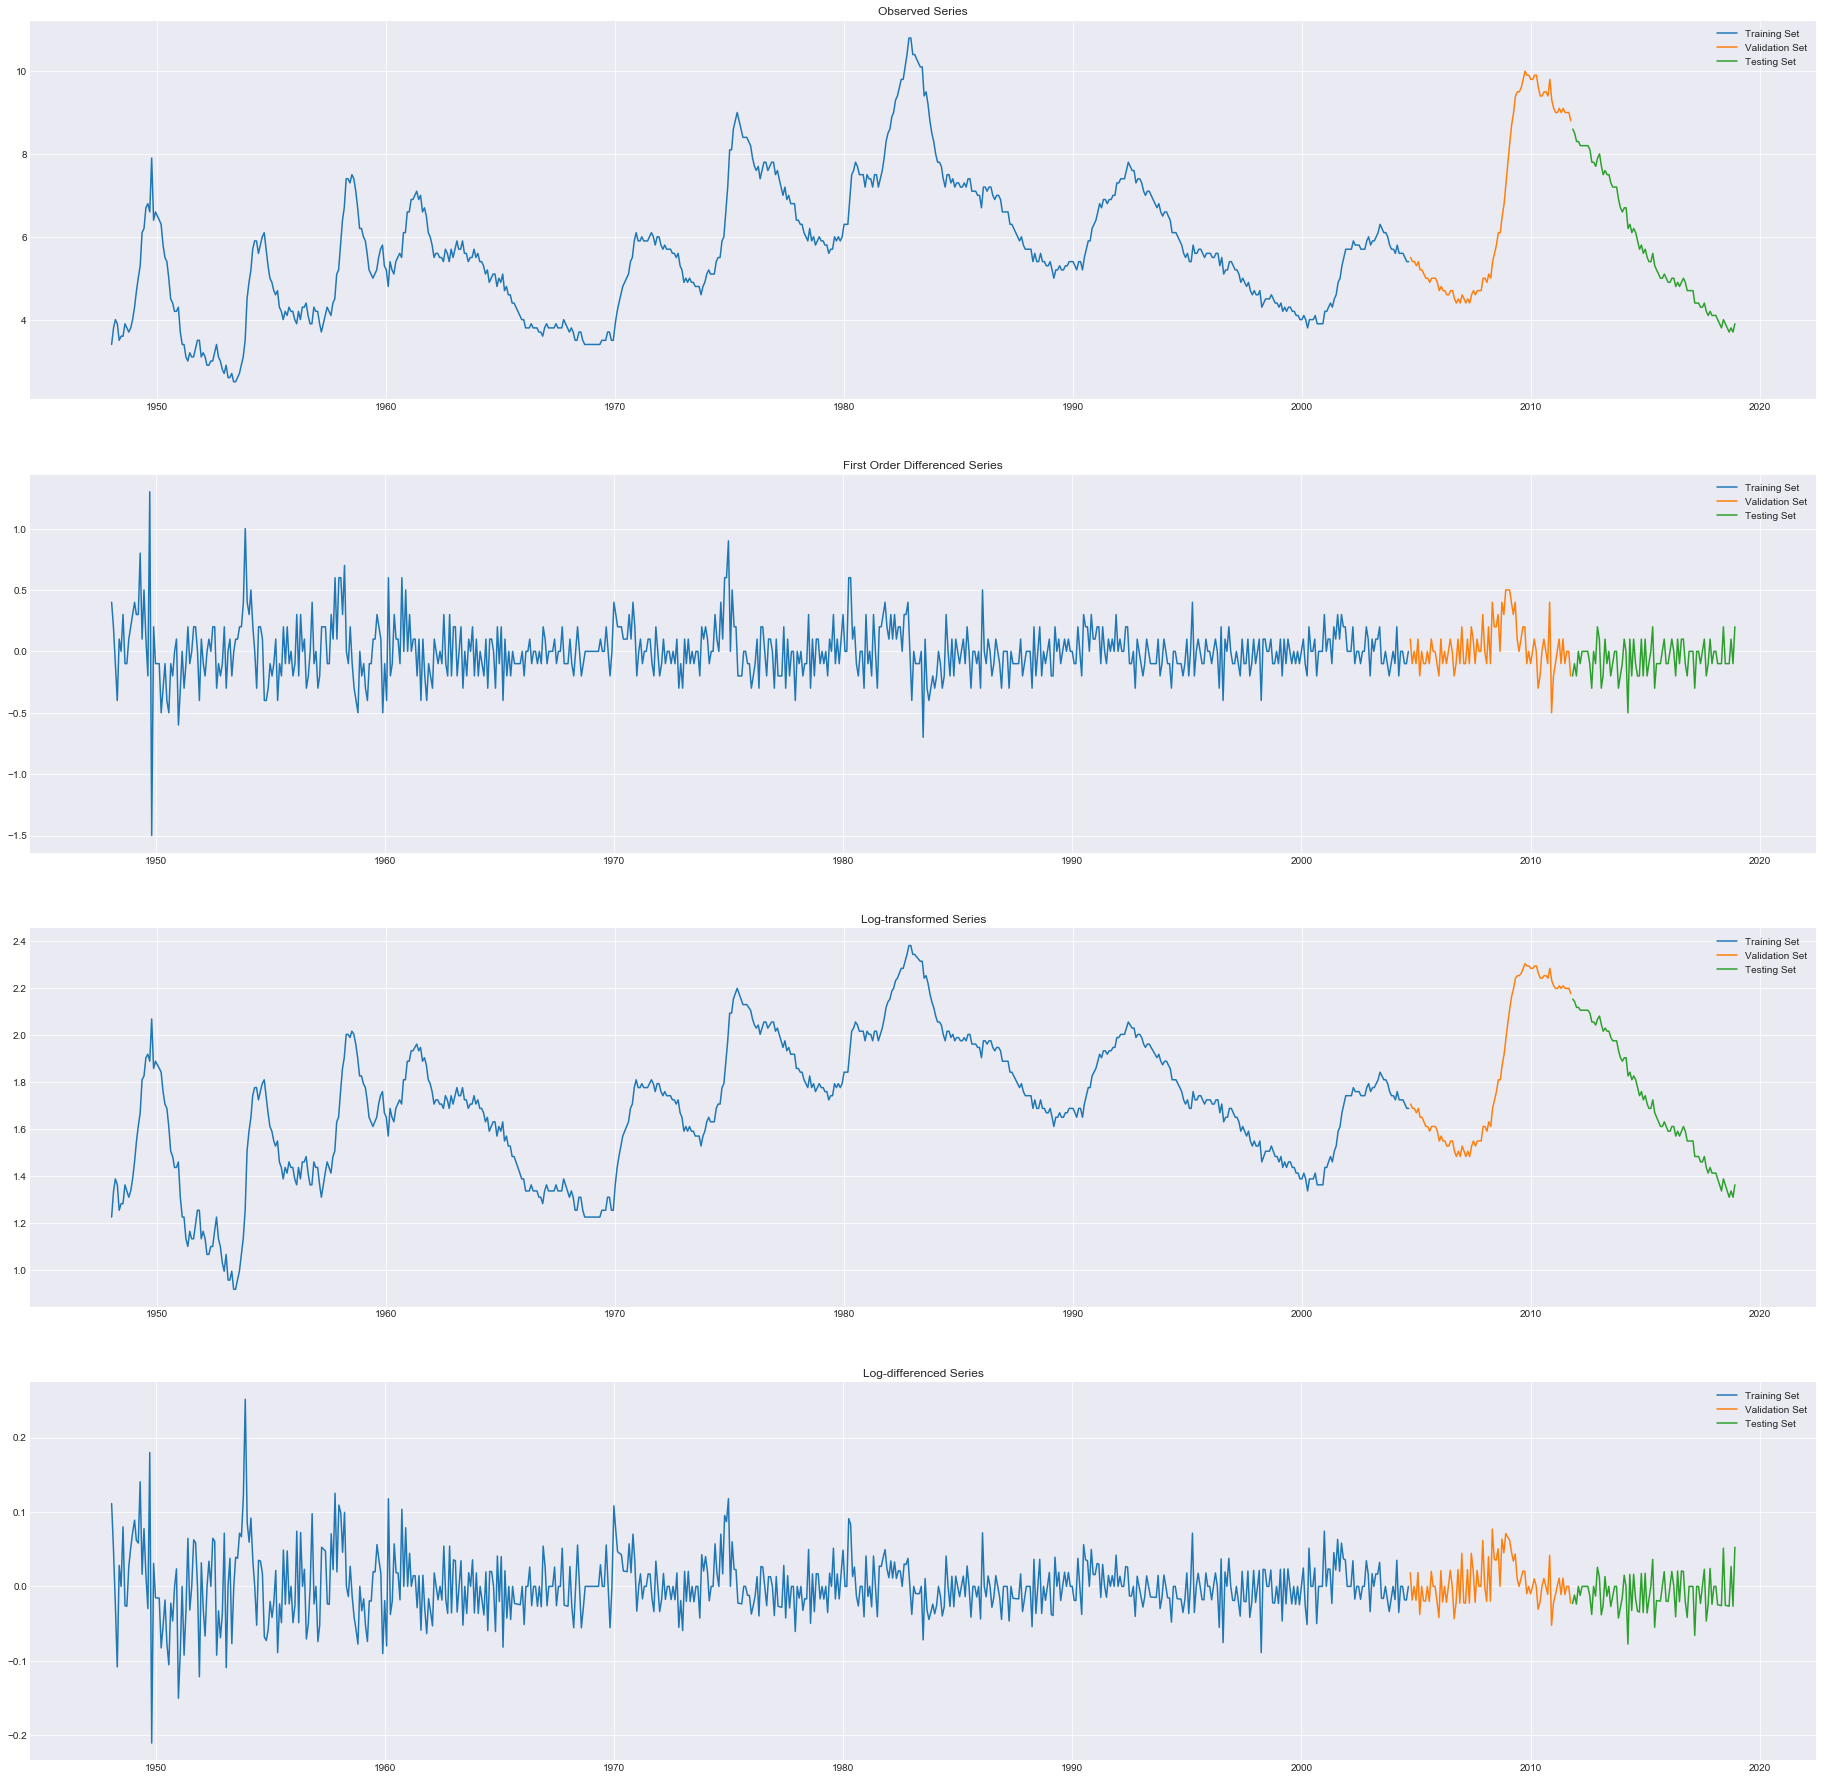

In [38]:
rcParams["figure.figsize"] = (32, 32)
ax1 = plt.subplot(4, 1, 1)
plt.title("Observed Series")

plt.plot(df[VAR_NAME][ts_train], label="Training Set")
plt.plot(df[VAR_NAME][ts_val], label="Validation Set")
plt.plot(df[VAR_NAME][ts_test], label="Testing Set")

plt.legend()
plt.grid(True)


ax2 = plt.subplot(4, 1, 2)
plt.title("First Order Differenced Series")
plt.plot(diff[VAR_NAME][ts_train], label="Training Set")
plt.plot(diff[VAR_NAME][ts_val], label="Validation Set")
plt.plot(diff[VAR_NAME][ts_test], label="Testing Set")

plt.legend()
plt.grid(True)


ax3 = plt.subplot(4, 1, 3)
plt.title("Log-transformed Series")
plt.plot(df_log[VAR_NAME][ts_train], label="Training Set")
plt.plot(df_log[VAR_NAME][ts_val], label="Validation Set")
plt.plot(df_log[VAR_NAME][ts_test], label="Testing Set")

plt.legend()
plt.grid(True)


ax4 = plt.subplot(4, 1, 4)
plt.title("Log-differenced Series")
plt.plot(log_diff[VAR_NAME][ts_train], label="Training Set")
plt.plot(log_diff[VAR_NAME][ts_val], label="Validation Set")
plt.plot(log_diff[VAR_NAME][ts_test], label="Testing Set")

plt.legend()
plt.grid(True)

plt.show()

## Naive Forecast: Persistent Forecasting
For each time step $t$, the forecasted value for next period, $f_{t, 1}$ is given by the observed value at $t$. That's,
$$
    f_{t, 1} = y_t \quad \forall t \in T
$$

Let $\omega \subseteq T$, then
$$
    I = \{y_t\}_{t \in \omega}
$$
denotes a **collection of information** where $n = |\omega|$ represents the total number of time steps in the set.

The one-step forecasting *Mean Squared Error (MSE)* on training and validation set, can be calculated based on
$$ MSE \equiv \frac{1}{n} \sum_{t \in \omega} (y_t - f_{t-1, 1})^2 = \frac{1}{n} \sum_{t \in \omega} (y_t - y_{t-1})^2$$

In [54]:
def persistent_pred_error(x) -> float:
    dx = x.diff()
    dx.dropna(inplace=True)
    return np.mean(dx.values ** 2)

In [55]:
print("==== First Ordered Differenced ====")
print(f"Training Set: {persistent_pred_error(diff[VAR_NAME][ts_train])}")
print(f"Validation Set: {persistent_pred_error(diff[VAR_NAME][ts_val])}")
print(f"Testing Set: {persistent_pred_error(diff[VAR_NAME][ts_test])}")

print("\n==== Log-Transformed ====")
print(f"Training Set: {persistent_pred_error(df_log[VAR_NAME][ts_train])}")
print(f"Validation Set: {persistent_pred_error(df_log[VAR_NAME][ts_val])}")
print(f"Testing Set: {persistent_pred_error(df_log[VAR_NAME][ts_test])}")

print("\n==== Log-Differenced ====")
print(f"Training Set: {persistent_pred_error(log_diff[VAR_NAME][ts_train])}")
print(f"Validation Set: {persistent_pred_error(log_diff[VAR_NAME][ts_val])}")
print(f"Testing Set: {persistent_pred_error(log_diff[VAR_NAME][ts_test])}")

==== First Ordered Differenced ====
Training Set: 0.08530191458026509
Validation Set: 0.04607142857142852
Testing Set: 0.041882352941176475

==== Log-Transformed ====
Training Set: 0.001618819255105979
Validation Set: 0.0008291323568654776
Testing Set: 0.0006615910308174235

==== Log-Differenced ====
Training Set: 0.0028101987795159955
Validation Set: 0.00122439923269616
Testing Set: 0.0014093907421832105


## Naive Forecast: Predict the Mean of Training Set
Given training set $I_{train}$ and testing set $I_{test}$, the forecasting is given by
$$
    f_{t, 1} = \frac{1}{|I_{train}|} \sum_{y_t \in I_{train}} y_t \quad \forall t \in T
$$
and the MSE is calculated based on
$$
    MSE = \frac{1}{|I_{test}|} \sum_{y_t \in I_{test}} (y_t - f_{t-1, 1})^2
$$

In [56]:
def mean_pred_error(train, test) -> float:
    avg = np.mean(train)
    return np.mean((test - avg) ** 2)

In [61]:
print("==== First Ordered Differenced ====")
print(f"Validation Set: {mean_pred_error(diff[VAR_NAME][ts_train], diff[VAR_NAME][ts_val])}")
print(f"Testing Set: {mean_pred_error(diff[VAR_NAME][ts_train], diff[VAR_NAME][ts_test])}")

==== First Ordered Differenced ====
Validation Set: 0.036714532871972315
Testing Set: 0.02115776132614469
